<a href="https://colab.research.google.com/github/Sparrow0hawk/covid_stuff/blob/master/notebooks/covid_transport_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating Apple Covid Mobility data

Using https://github.com/ActiveConclusion/COVID19_mobility/blob/master/apple_reports/applemobilitytrends.csv

In [5]:
! curl -O https://raw.githubusercontent.com/ActiveConclusion/COVID19_mobility/master/apple_reports/applemobilitytrends.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3858k  100 3858k    0     0  8054k      0 --:--:-- --:--:-- --:--:-- 8054k


In [6]:
! head applemobilitytrends.csv

geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
dataset = pd.read_csv('applemobilitytrends.csv')

dataset.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,...,46.78,45.51,56.09,51.12,59.04,61.14,65.34,56.11,53.39,73.94,66.27,65.59,66.11,67.85,67.47,68.61,90.62,88.33,89.97,84.30,93.46,102.16,111.59,93.78,95.51,92.69,96.27,115.30,126.24,129.96,101.84,97.59,95.12,99.95,119.85,136.26,128.16,109.24,105.57,113.27
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,...,48.36,45.20,67.46,63.20,66.57,67.97,68.49,48.02,42.56,74.97,70.66,65.67,67.16,69.89,56.67,59.53,84.18,93.86,87.72,94.75,83.24,81.96,87.25,87.38,90.83,91.09,89.13,97.74,97.95,77.91,88.49,92.28,89.77,94.63,96.59,97.74,84.18,96.67,97.83,103.88
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,...,38.29,22.01,40.01,41.34,41.53,41.52,47.52,41.34,23.81,28.11,40.86,42.91,43.77,48.26,40.39,23.77,39.64,41.88,43.77,45.84,52.26,47.48,27.32,44.06,47.00,48.10,49.36,56.59,52.09,30.96,33.74,48.36,49.04,50.71,60.57,57.48,32.01,42.79,46.38,48.12
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.20,128.75,103.47,...,28.81,18.49,30.79,30.37,28.85,29.04,31.99,31.40,16.83,21.37,30.85,33.27,32.63,34.67,28.70,17.40,29.50,31.25,30.65,31.93,37.34,33.53,19.60,34.36,35.81,36.25,36.61,41.45,35.27,21.26,25.34,35.80,36.15,37.47,42.79,40.95,24.00,31.28,33.56,34.09
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,115.65,109.66,88.59,85.18,95.91,99.40,99.92,103.04,103.73,85.73,93.39,95.83,98.63,102.40,107.46,106.55,86.33,98.78,100.08,103.28,106.19,116.62,115.36,93.51,...,65.88,72.17,73.58,75.83,76.35,81.42,82.51,65.78,74.12,77.10,79.92,82.65,88.37,92.70,73.04,78.07,80.87,84.72,88.62,100.24,104.34,83.85,85.16,86.92,88.07,90.36,98.28,100.97,81.74,86.30,89.68,92.79,94.78,103.06,106.05,85.04,88.15,91.10,94.49,97.77


In [14]:
# see how much NA data there is
pd.DataFrame(dataset.isna().sum()).T

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24
0,0,0,0,2892,844,153,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39


In [16]:
UK_dat = dataset[dataset.country == "United Kingdom"]

UK_dat.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24
218,city,Belfast,driving,NaN,Northern Ireland,United Kingdom,100.0,108.49,111.95,124.10,125.70,121.01,81.15,105.81,111.29,117.19,111.33,123.62,120.68,83.35,104.53,111.83,113.30,122.51,127.43,126.86,88.98,103.86,111.70,114.45,115.24,123.25,116.00,77.55,107.16,105.29,115.25,121.03,128.31,116.11,...,59.42,43.95,55.90,63.63,66.24,68.07,76.52,71.76,59.14,70.46,73.97,74.83,79.61,88.82,82.05,67.40,78.32,77.98,78.37,75.85,86.38,77.98,67.30,75.51,80.01,79.74,86.63,92.44,93.41,75.58,86.49,88.45,86.84,91.51,100.90,101.31,68.40,88.22,92.40,101.75
219,city,Belfast,transit,NaN,Northern Ireland,United Kingdom,100.0,100.20,103.68,118.45,113.70,104.21,92.71,103.94,101.94,107.15,100.33,111.23,105.68,84.43,99.40,107.55,106.08,111.97,107.49,103.54,93.65,97.73,95.79,114.51,120.25,100.67,95.59,90.37,109.63,100.00,117.98,101.40,121.59,103.54,...,21.93,18.25,25.20,27.81,26.00,25.53,20.79,16.51,25.00,26.80,25.80,28.54,29.01,22.93,27.54,30.01,32.95,32.42,31.02,29.61,22.93,28.14,23.06,28.94,32.29,28.41,24.40,28.94,32.69,29.81,34.76,33.29,31.28,31.35,32.29,32.89,28.28,37.77,38.57,41.38
220,city,Belfast,walking,NaN,Northern Ireland,United Kingdom,100.0,116.70,123.20,127.89,147.78,179.12,93.03,121.72,127.02,128.53,120.19,152.23,165.74,94.30,112.80,111.06,131.11,135.05,150.14,190.08,100.42,107.81,119.34,133.00,131.19,145.62,163.31,84.72,110.88,104.86,130.82,137.68,174.50,180.12,...,55.19,35.91,48.71,52.19,58.72,57.87,58.86,55.51,48.21,63.38,57.57,60.01,65.53,74.33,69.47,51.62,61.63,59.25,58.84,53.08,60.56,62.18,48.54,55.73,58.66,56.86,67.49,65.90,72.00,52.53,66.37,61.71,65.03,64.86,72.60,76.06,44.21,66.23,68.76,75.64
234,city,Birmingham,driving,NaN,England,United Kingdom,100.0,104.03,102.98,103.80,105.29,102.57,85.85,104.19,107.52,106.28,107.32,109.67,106.49,87.77,99.69,108.12,108.75,102.93,110.65,106.63,89.76,99.36,105.25,104.19,107.74,114.86,104.45,84.46,103.17,108.72,106.75,106.71,118.65,103.96,...,58.57,51.65,60.57,64.60,66.88,66.76,73.42,65.66,56.99,66.59,74.01,74.69,76.36,81.95,75.50,68.77,76.56,78.20,71.70,73.19,77.39,70.36,60.43,72.37,74.39,73.91,73.18,80.08,80.25,69.46,79.50,78.46,78.50,79.40,87.23,86.53,71.50,85.26,89.11,92.19
235,city,Birmingham,transit,NaN,England,United Kingdom,100.0,102.32,103.58,100.84,97.53,87.24,83.08,102.35,103.16,106.99,100.85,99.86,90.47,83.71,103.48,106.51,105.37,103.24,98.45,88.86,82.38,101.36,105.08,108.81,102.72,103.46,89.19,80.68,101.47,105.77,107.16,103.45,104.24,88.53,...,23.93,26.26,29.45,28.45,31.57,27.89,30.04,26.10,26.43,31.70,35.37,35.58,34.98,34.37,32.84,34.66,39.77,40.82,34.32,34.79,34.23,28.68,31.55,38.50,39.40,38.22,38.46,39.79,33.58,35.57,42.59,44.14,41.51,41.32,42.88,39.32,35.84,48.18,50.92,52.72


In [20]:
UK_dat.columns

Index(['geo_type', 'region', 'transportation_type', 'alternative_name',
       'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16',
       ...
       '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
       '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24'],
      dtype='object', length=170)

In [17]:
UK_dat.shape

(55, 170)

In [18]:
UK_dat.region.unique()

array(['Belfast', 'Birmingham', 'Bradford', 'Bristol', 'Cardiff',
       'Edinburgh', 'Glasgow', 'Leeds', 'Liverpool', 'London',
       'Manchester', 'Newcastle upon Tyne', 'Nottingham', 'Portsmouth',
       'Reading', 'Sheffield', 'Bailiwick of Guernsey',
       'Bailiwick of Jersey', 'England', 'Isle of Man',
       'Northern Ireland', 'Scotland', 'Wales'], dtype=object)

In [61]:
points_of_int = ['Belfast', 'Birmingham', 'Bradford', 'Bristol', 'Cardiff',
       'Edinburgh', 'Glasgow', 'Leeds', 'Liverpool', 'London',
       'Manchester', 'Newcastle upon Tyne', 'Nottingham', 'Portsmouth',
       'Reading', 'Sheffield']

print(len(points_of_int))

16


In [34]:
UK_dat_working = UK_dat.copy()

UK_dat_working = UK_dat_working.drop(['geo_type', 'alternative_name','sub-region', 'country'], axis=1)

In [35]:
UK_dat_working.head()

,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,...,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24
218,Belfast,driving,100.0,108.49,111.95,124.10,125.70,121.01,81.15,105.81,111.29,117.19,111.33,123.62,120.68,83.35,104.53,111.83,113.30,122.51,127.43,126.86,88.98,103.86,111.70,114.45,115.24,123.25,116.00,77.55,107.16,105.29,115.25,121.03,128.31,116.11,86.77,115.35,121.93,128.35,...,59.42,43.95,55.90,63.63,66.24,68.07,76.52,71.76,59.14,70.46,73.97,74.83,79.61,88.82,82.05,67.40,78.32,77.98,78.37,75.85,86.38,77.98,67.30,75.51,80.01,79.74,86.63,92.44,93.41,75.58,86.49,88.45,86.84,91.51,100.90,101.31,68.40,88.22,92.40,101.75
219,Belfast,transit,100.0,100.20,103.68,118.45,113.70,104.21,92.71,103.94,101.94,107.15,100.33,111.23,105.68,84.43,99.40,107.55,106.08,111.97,107.49,103.54,93.65,97.73,95.79,114.51,120.25,100.67,95.59,90.37,109.63,100.00,117.98,101.40,121.59,103.54,99.20,123.33,133.29,129.68,...,21.93,18.25,25.20,27.81,26.00,25.53,20.79,16.51,25.00,26.80,25.80,28.54,29.01,22.93,27.54,30.01,32.95,32.42,31.02,29.61,22.93,28.14,23.06,28.94,32.29,28.41,24.40,28.94,32.69,29.81,34.76,33.29,31.28,31.35,32.29,32.89,28.28,37.77,38.57,41.38
220,Belfast,walking,100.0,116.70,123.20,127.89,147.78,179.12,93.03,121.72,127.02,128.53,120.19,152.23,165.74,94.30,112.80,111.06,131.11,135.05,150.14,190.08,100.42,107.81,119.34,133.00,131.19,145.62,163.31,84.72,110.88,104.86,130.82,137.68,174.50,180.12,110.67,140.92,149.26,155.51,...,55.19,35.91,48.71,52.19,58.72,57.87,58.86,55.51,48.21,63.38,57.57,60.01,65.53,74.33,69.47,51.62,61.63,59.25,58.84,53.08,60.56,62.18,48.54,55.73,58.66,56.86,67.49,65.90,72.00,52.53,66.37,61.71,65.03,64.86,72.60,76.06,44.21,66.23,68.76,75.64
234,Birmingham,driving,100.0,104.03,102.98,103.80,105.29,102.57,85.85,104.19,107.52,106.28,107.32,109.67,106.49,87.77,99.69,108.12,108.75,102.93,110.65,106.63,89.76,99.36,105.25,104.19,107.74,114.86,104.45,84.46,103.17,108.72,106.75,106.71,118.65,103.96,95.88,112.14,113.38,117.40,...,58.57,51.65,60.57,64.60,66.88,66.76,73.42,65.66,56.99,66.59,74.01,74.69,76.36,81.95,75.50,68.77,76.56,78.20,71.70,73.19,77.39,70.36,60.43,72.37,74.39,73.91,73.18,80.08,80.25,69.46,79.50,78.46,78.50,79.40,87.23,86.53,71.50,85.26,89.11,92.19
235,Birmingham,transit,100.0,102.32,103.58,100.84,97.53,87.24,83.08,102.35,103.16,106.99,100.85,99.86,90.47,83.71,103.48,106.51,105.37,103.24,98.45,88.86,82.38,101.36,105.08,108.81,102.72,103.46,89.19,80.68,101.47,105.77,107.16,103.45,104.24,88.53,86.75,106.79,110.96,110.95,...,23.93,26.26,29.45,28.45,31.57,27.89,30.04,26.10,26.43,31.70,35.37,35.58,34.98,34.37,32.84,34.66,39.77,40.82,34.32,34.79,34.23,28.68,31.55,38.50,39.40,38.22,38.46,39.79,33.58,35.57,42.59,44.14,41.51,41.32,42.88,39.32,35.84,48.18,50.92,52.72


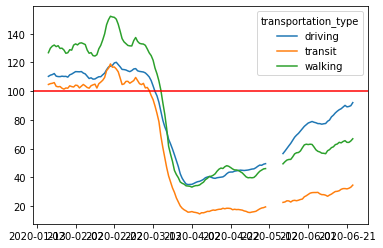

In [71]:
UK_dat_working.set_index('transportation_type').iloc[:3,1:].T.rolling(7).mean().plot()

plt.axhline(100, color='r')

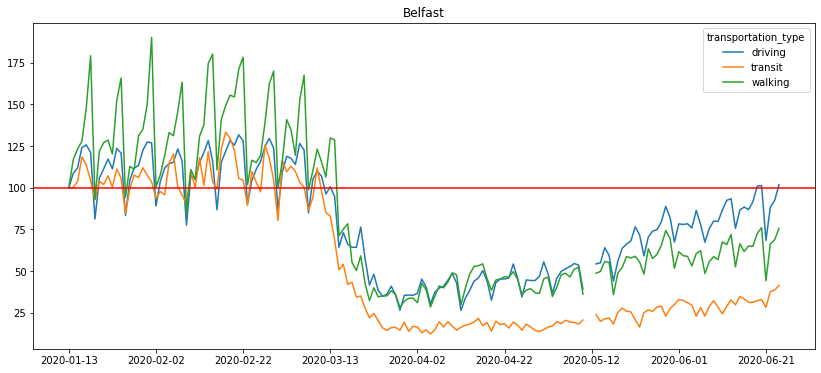

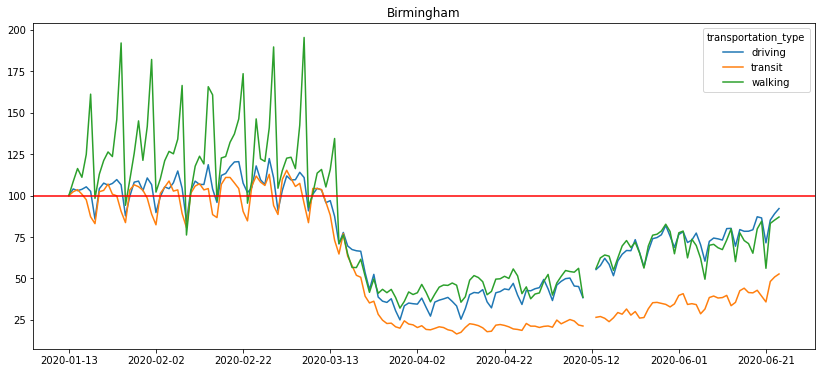

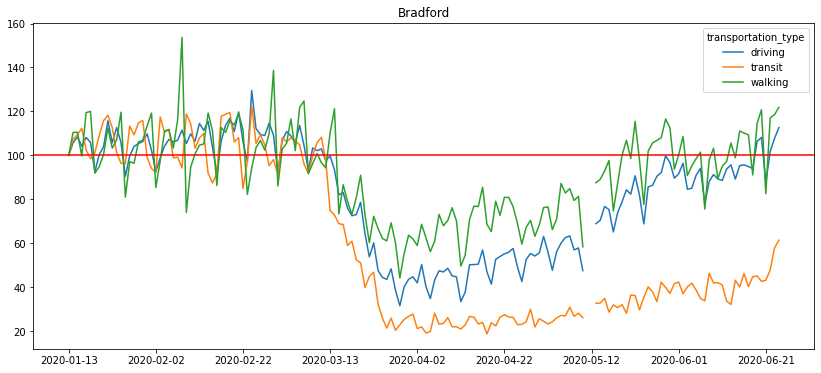

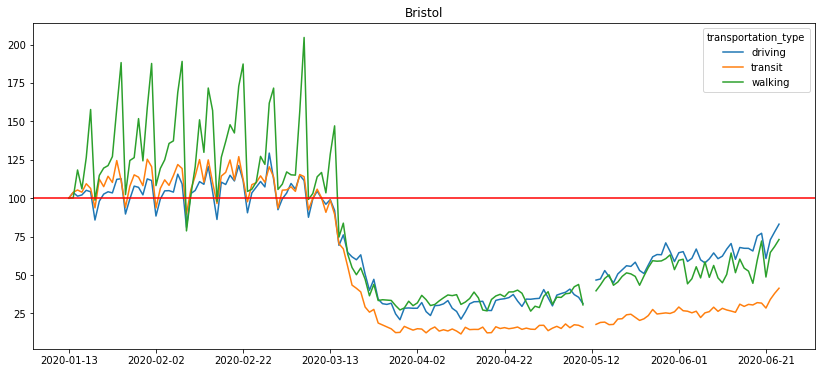

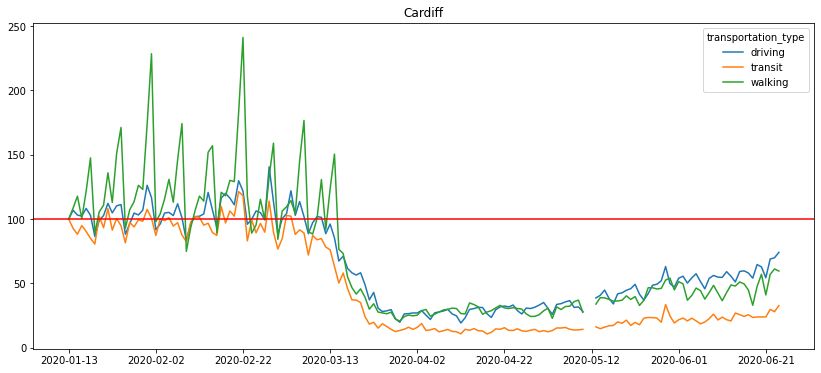

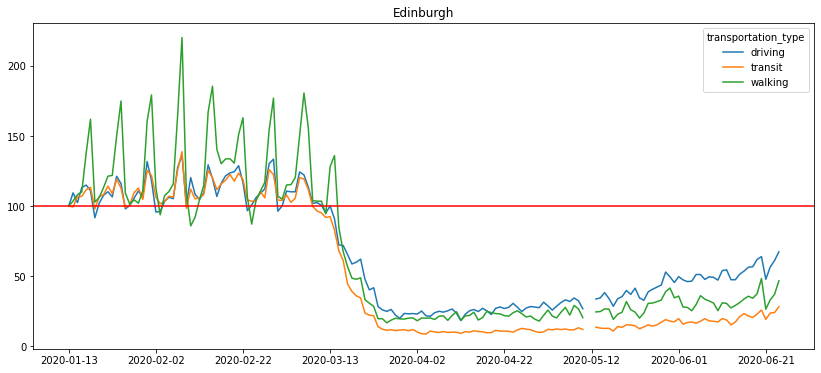

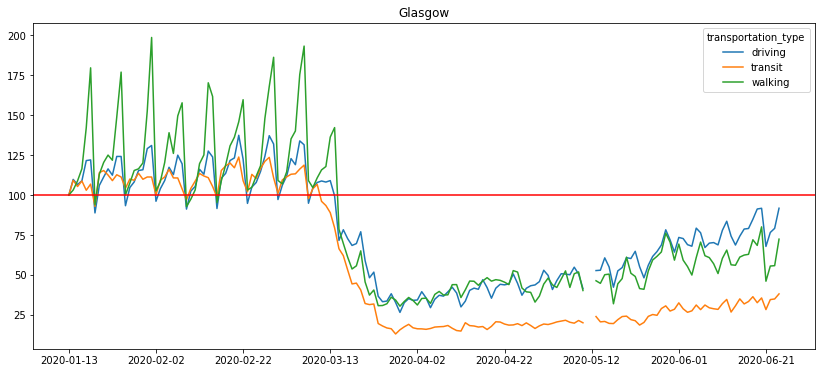

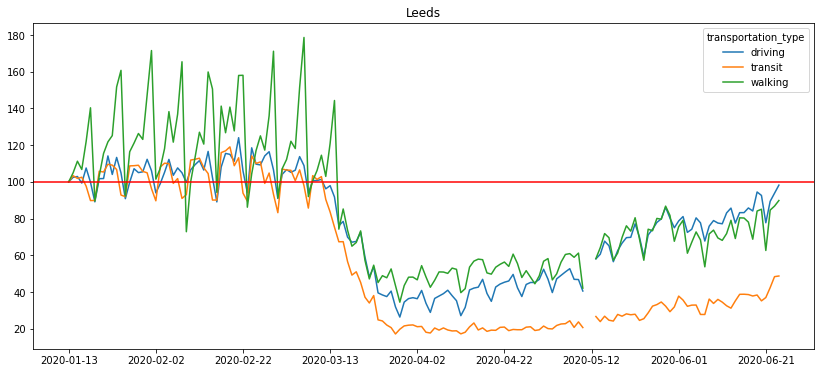

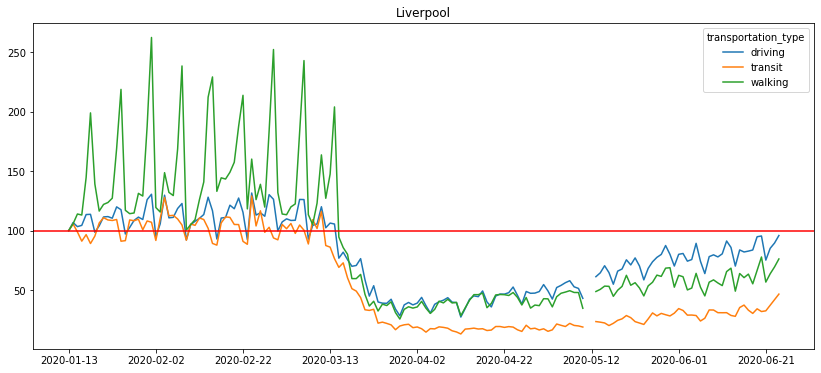

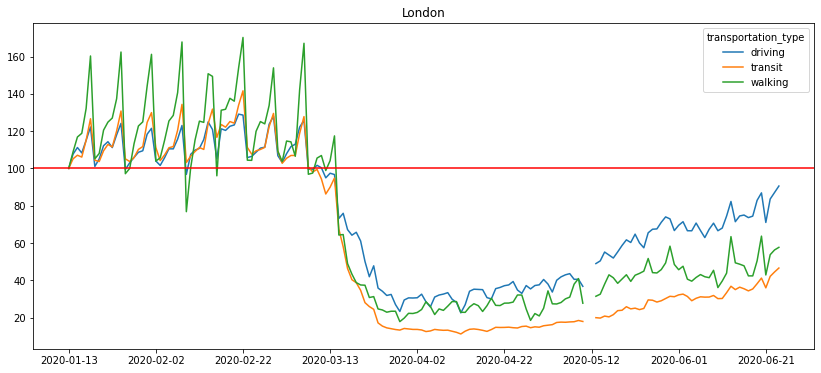

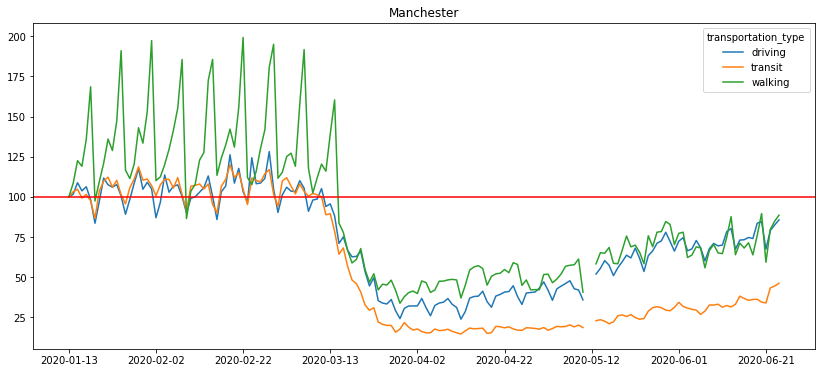

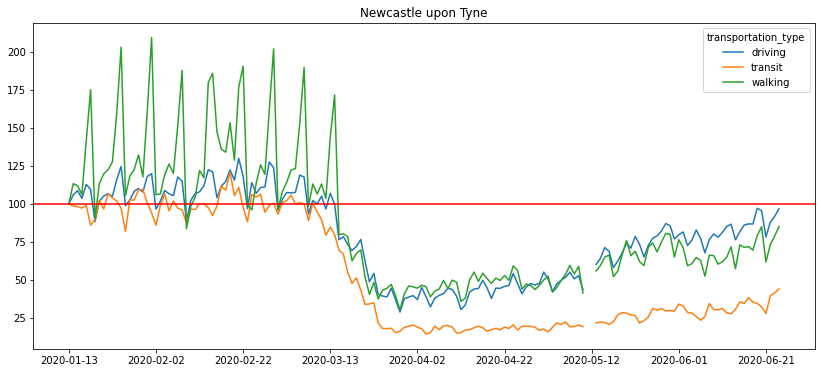

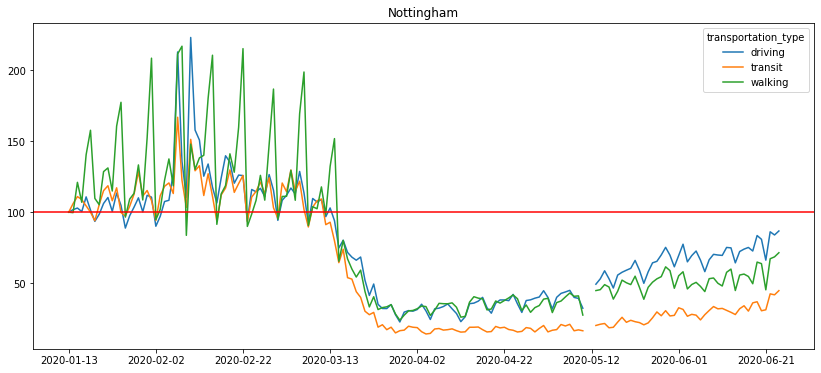

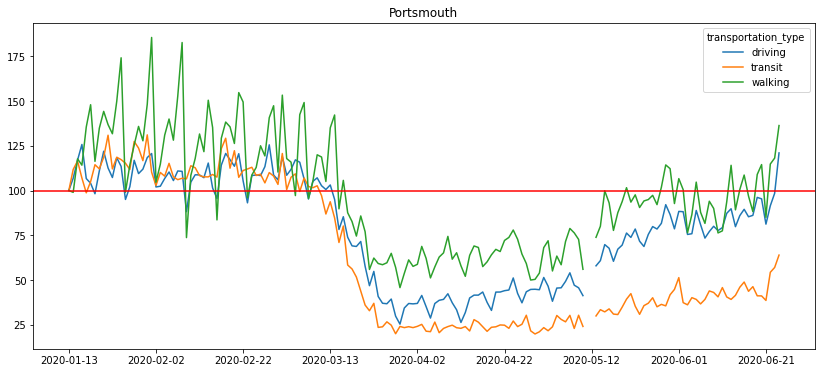

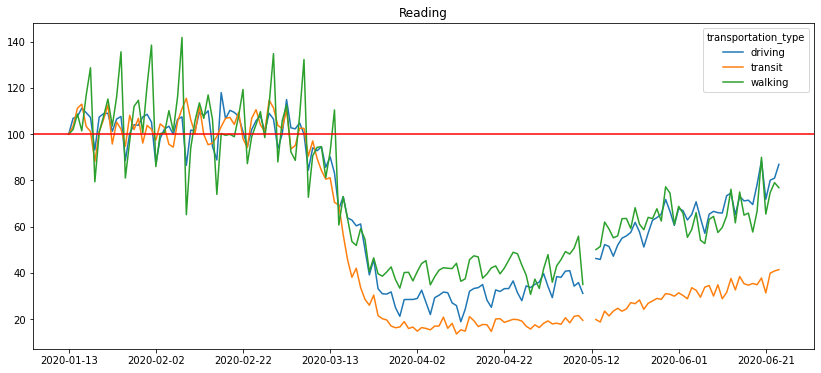

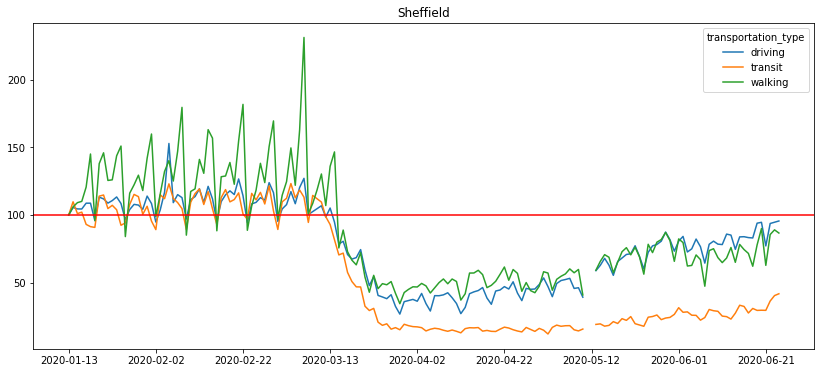

In [72]:
for city in points_of_int:
  working_frame = UK_dat_working[UK_dat_working.region == city].copy()

  working_frame.drop(['region'], axis=1, inplace=True)

  working_frame.set_index('transportation_type').T.plot(figsize=(14,6))

  plt.axhline(100, color='r')

  plt.title(city)

  plt.figure()

  plt.close()

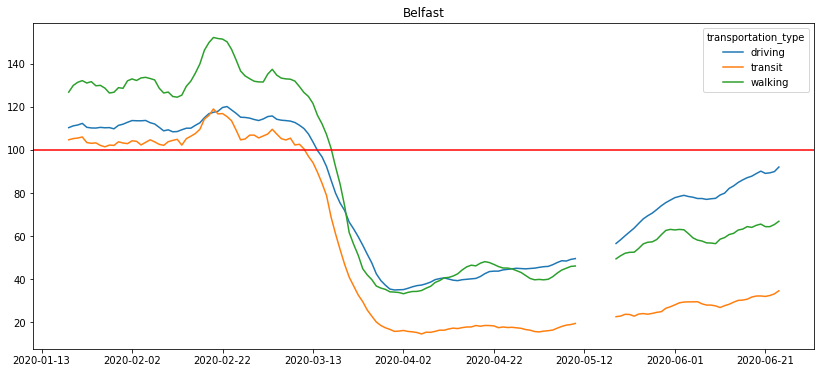

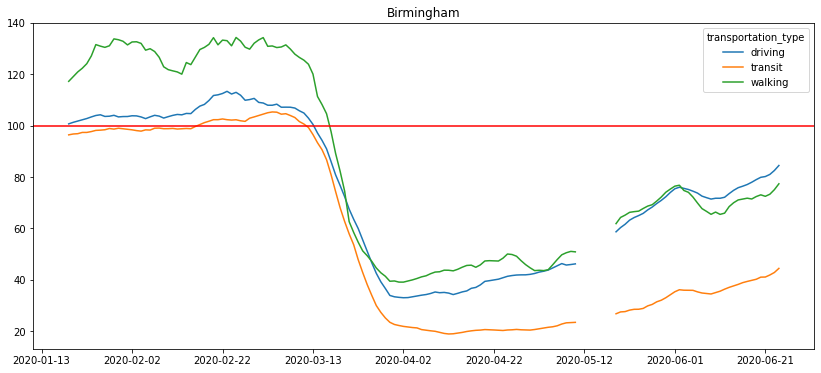

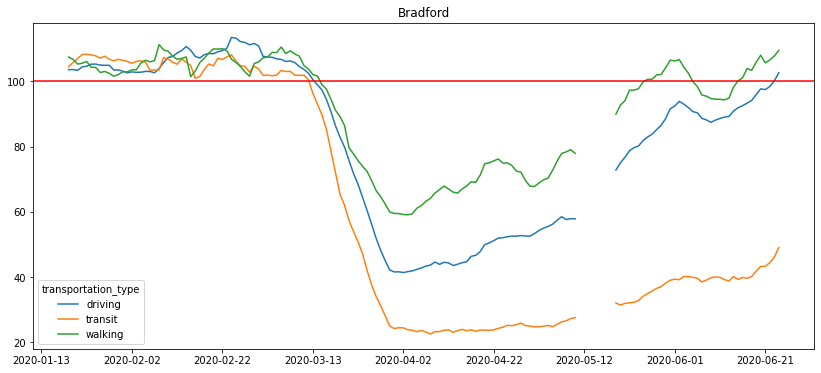

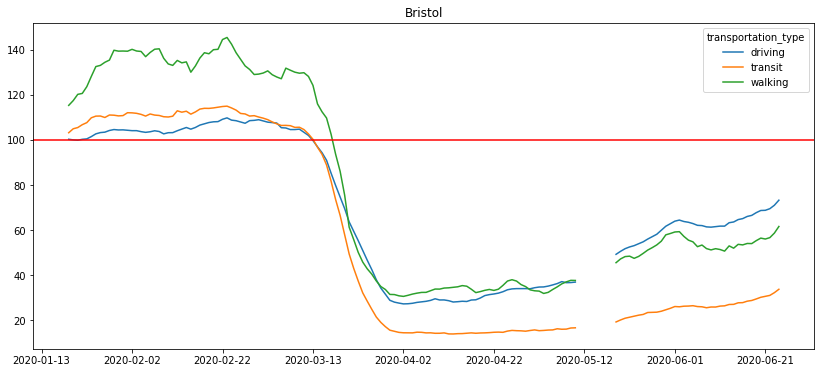

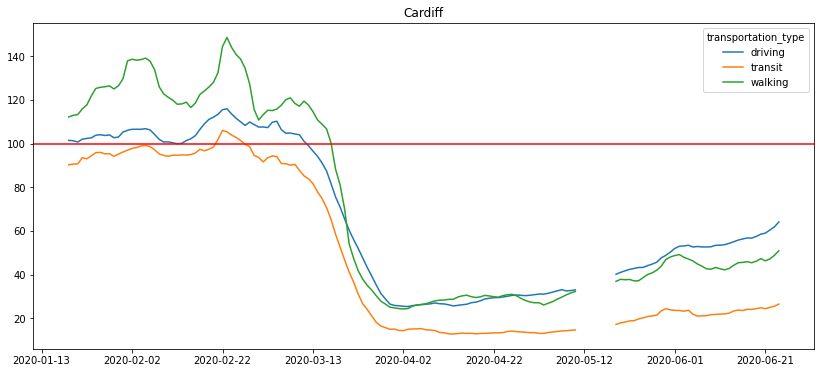

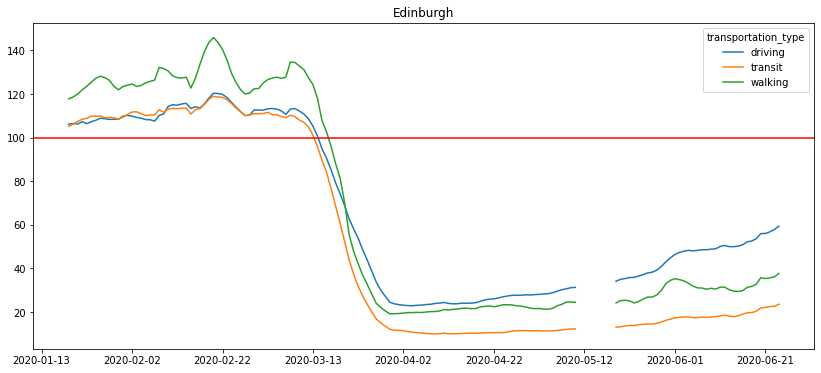

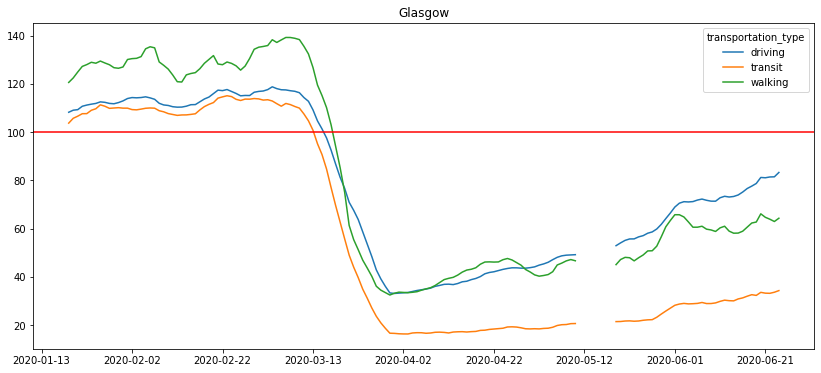

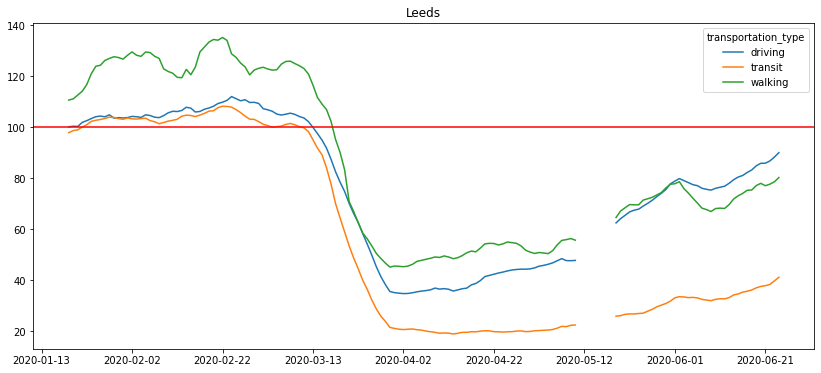

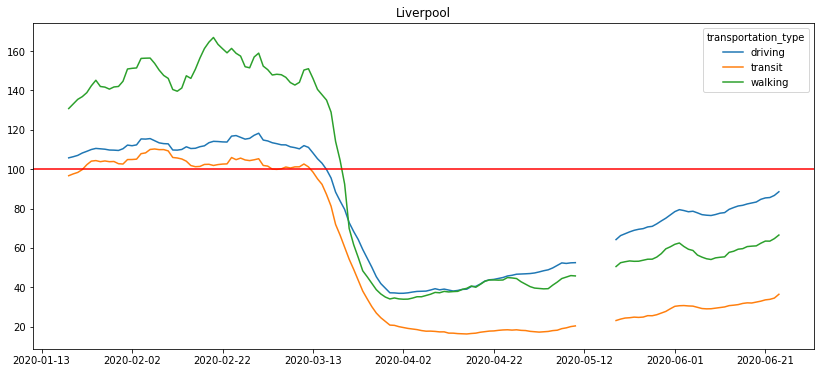

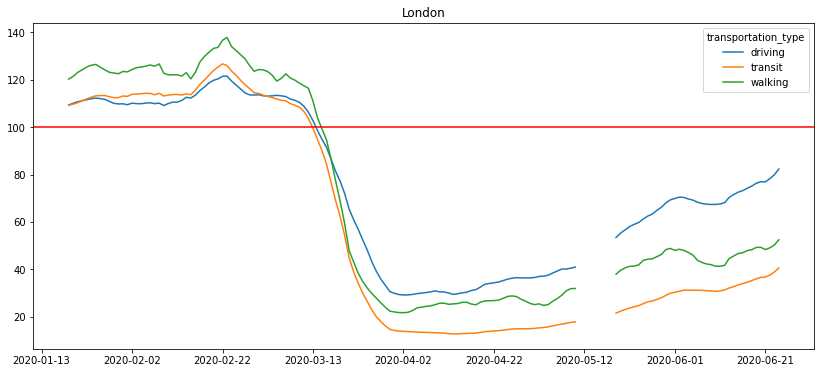

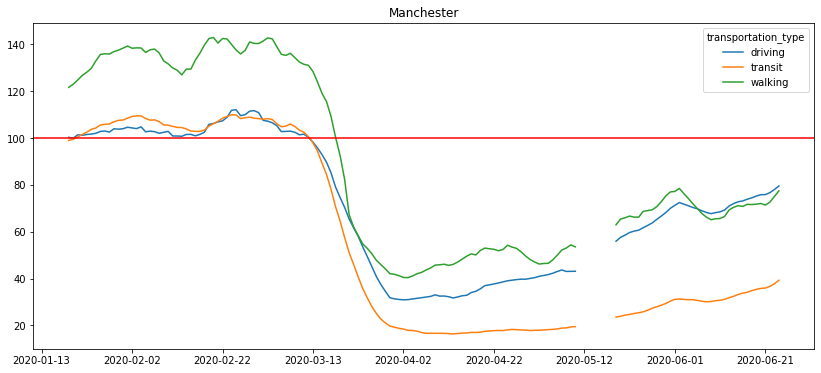

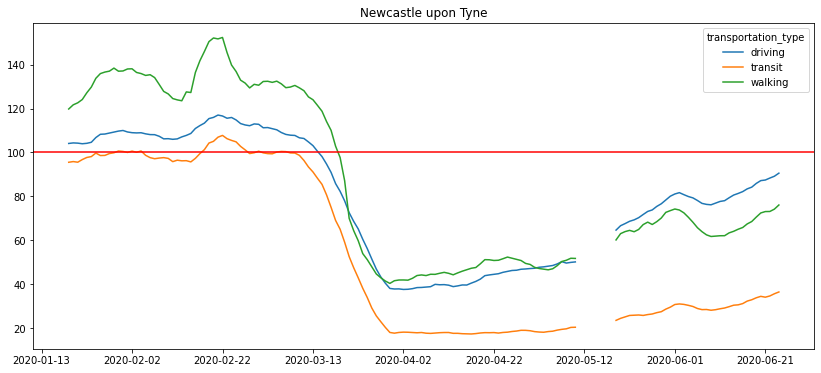

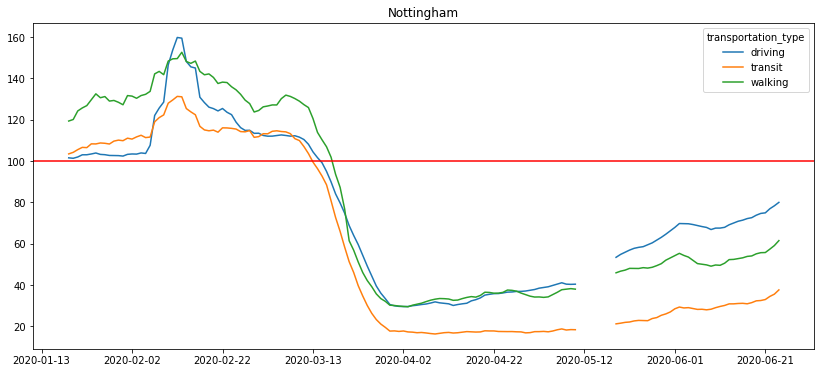

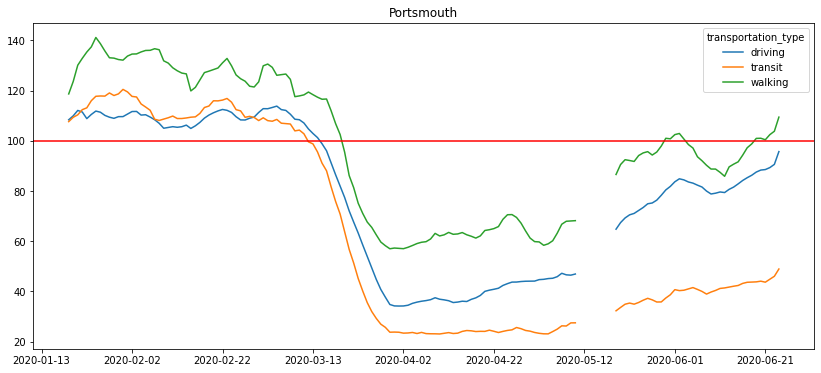

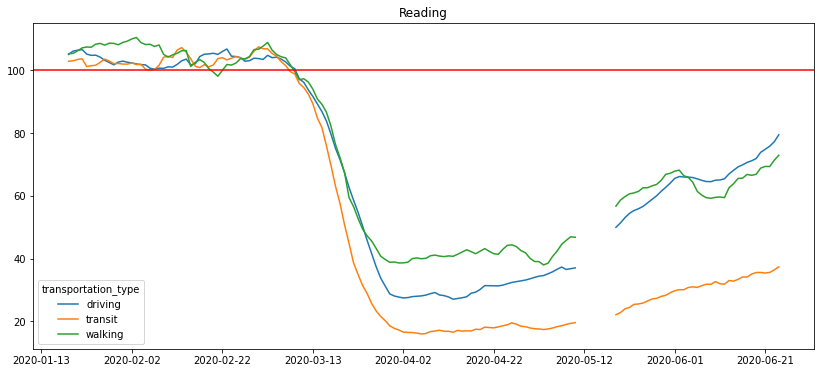

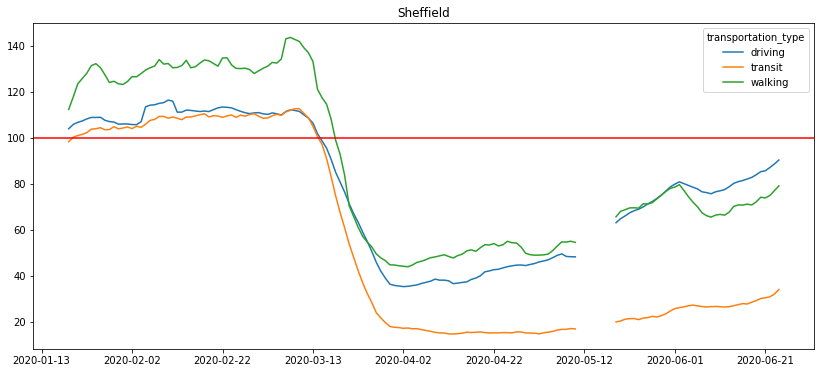

In [73]:
for city in points_of_int:
  working_frame = UK_dat_working[UK_dat_working.region == city].copy()

  working_frame.drop(['region'], axis=1, inplace=True)

  working_frame.set_index('transportation_type').T.rolling(7).mean().plot(figsize=(14,6))

  plt.axhline(100, color='r')

  plt.title(city)

  plt.figure()

  plt.close()